# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [2]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

C:\Users\kovac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

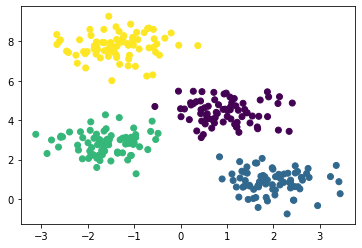

In [3]:
#make the dataset with make_blobs
#your code here

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, n_features=2, random_state=0)

plot = plt.scatter(X[:, 0], X[:, 1], c=y)

#print(X.shape)

In [4]:
print(X)

[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 [-2.88024255e+00  2

### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [5]:
#implement square diff
# your code here


n = len(X)    # length of array


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

len(X_train)
len(X_test)

# d = ((X_train[i] - X_test[1])**2)

dist = []

for i in range(len(X_train)):
    d = np.sqrt(((X_train[i] - X_test)**2))
    dist.append(d)

    
    #print(d)
    

distance = np.array(dist)
distance = np.sort(distance)
distance

array([[[1.11702168, 4.17661348],
        [0.87467034, 2.9077714 ],
        [2.97093953, 5.3492323 ],
        ...,
        [2.17114434, 3.33739712],
        [2.36167077, 3.22542625],
        [0.74886352, 0.98360696]],

       [[0.67833568, 5.7373593 ],
        [2.62360745, 3.94660958],
        [0.52733826, 1.50514868],
        ...,
        [0.16088067, 4.68323664],
        [1.13660703, 3.62895473],
        [4.48188475, 6.10551746]],

       [[0.30980432, 1.14644573],
        [0.64430399, 2.99213882],
        [0.89586963, 3.08576489],
        ...,
        [0.09232308, 0.52941204],
        [0.96195883, 1.50513839],
        [1.5146039 , 4.85041612]],

       ...,

       [[2.14024856, 4.24635778],
        [0.94441464, 3.93099828],
        [3.04068383, 6.37245918],
        ...,
        [3.19437122, 3.40714143],
        [2.43141507, 4.24865313],
        [0.91386265, 1.7720904 ]],

       [[1.46606686, 3.00784232],
        [0.29410082, 3.25681659],
        [1.80216837, 5.69827749],
        .

In [6]:
d = ((X_train - X_test)**2)

len(d)

ValueError: operands could not be broadcast together with shapes (201,2) (99,2) 

In [ ]:
ndist = len(dist)
assert ndist == len(X_train) , "It's not equal in length"

In [8]:
for x_test in X_test:
    for x_train in X_train:
            d = np.sqrt(((X_train - X_test)**2))
            print(d)

ValueError: operands could not be broadcast together with shapes (201,2) (99,2) 

In [ ]:
len(X_train)

In [7]:
m = X_test.shape[0]
n = X_train.shape[0]

for i in range(m):
  for j in range(n):
    d = distance(X_train[j], X_test[i])

TypeError: 'numpy.ndarray' object is not callable

In [61]:
#implement root sum squares
#your code here

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
#implement the euclidean distances function
#your code here


In [41]:
#implement the evaluate function
#your code here


### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [22]:
#implement the predict function
#your code here


In [61]:
predictions = predict(X, y_true, k=3)

In [63]:
print('Accuracy {:0.2f}%'.format(evaluate(predictions, y_true)))

Accuracy 17.67%
